# Descripción

Clasificación binaria, **Experimento M-B**: Malignant-Benign M-B.
- El tamaño de las imágenes  es de 224x22
- Las etiquetas se generan aquí
- NO se toman en cuenta las imágenes BWC

In [1]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import cv2

# CLAHE

In [2]:
# CLAHE STANDAR cliplimit = 40 y grid de 8
clahe_stdr = cv2.createCLAHE()

# Cargamos las  rutas de las imágenes:

MASAS:

In [3]:
rutas_train_mass_benign = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_train_mass_BENIGN_577.npy')

In [4]:
len(rutas_train_mass_benign)

577

In [5]:
rutas_test_mass_benign = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_test_mass_BENIGN_194.npy')

In [6]:
len(rutas_test_mass_benign)

194

In [7]:
rutas_train_mass_malignant = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_train_mass_MALIGNANT_637.npy')

In [8]:
len(rutas_train_mass_malignant)

637

In [9]:
rutas_test_mass_malignant = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_test_mass_MALIGNANT_147.npy')

In [10]:
len(rutas_test_mass_malignant)

147

Calcificaciones

In [12]:
rutas_train_calc_benign = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_train_calc_BENIGN_528.npy')

In [13]:
len(rutas_train_calc_benign)

528

In [14]:
rutas_test_calc_benign = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_test_calc_BENIGN_130.npy')

In [15]:
len(rutas_test_calc_benign)

130

In [16]:
rutas_train_calc_malignant = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_train_calc_MALIGNANT_544.npy')

In [17]:
len(rutas_train_calc_malignant)

544

In [18]:
rutas_test_calc_malignant = np.load(r'D:\Guillermo\Pruebas_con_parches_CBIS-DDSM\Rutas_por_etiquetas\nueva_lista_rutas_test_calc_MALIGNANT_129.npy')

In [19]:
len(rutas_test_calc_malignant)

129

In [20]:
129+544+130+528

1331

In [21]:
#Tolat de imagenes:
1331+1555

2886

# Generamos las etiquetas (numericas) para ingresarlas al modelo

Malignant = 0

In [27]:
etiq_train_malignant = np.zeros(len(rutas_train_calc_malignant)+len(rutas_train_mass_malignant), dtype=int) #Calc M y Mass M

In [28]:
len(etiq_train_malignant)

1181

In [29]:
etiq_test_malignant = np.zeros(len(rutas_test_calc_malignant)+len(rutas_test_mass_malignant), dtype=int) #Calc M y Mass M

In [30]:
len(etiq_test_malignant)

276

Benign = 1

In [31]:
etiq_train_benign = np.ones(len(rutas_train_calc_benign)+len(rutas_train_mass_benign), dtype=int) #Calc B y Mass B

In [32]:
len(etiq_train_benign)

1105

In [33]:
etiq_test_benign = np.ones(len(rutas_test_calc_benign)+len(rutas_test_mass_benign), dtype=int) #Calc B y Mass B

In [34]:
len(etiq_test_benign)

324

In [35]:
1181+276+1105+324

2886

# Concatenamos las rutas de las imagenes

No importa la anormalidad (Masas y Calcificaciones), interesa concatenarlas por patología (Maligna-Benigna)

In [36]:
rutas_train_malignant = np.concatenate((rutas_train_calc_malignant,rutas_train_mass_malignant)) #Calc M y Mass M

In [37]:
len(rutas_train_malignant)

1181

In [38]:
rutas_test_malignant = np.concatenate((rutas_test_calc_malignant,rutas_test_mass_malignant)) #Calc M y Mass M

In [39]:
len(rutas_test_malignant)

276

In [40]:
rutas_train_benign = np.concatenate((rutas_train_calc_benign,rutas_train_mass_benign)) #Calc B y Mass B

In [41]:
len(rutas_train_benign)

1105

In [42]:
rutas_test_benign = np.concatenate((rutas_test_calc_benign,rutas_test_mass_benign)) #Calc B y Mass B

In [43]:
len(rutas_test_benign)

324

# Creamos los conjuntos Train, Validación
Usamos  **train_test_split** de sklearn para su reproducibilidad.

In [44]:
X = np.concatenate((rutas_train_malignant,rutas_train_benign))
y = np.concatenate((etiq_train_malignant, etiq_train_benign))

In [45]:
len(X)

2286

In [46]:
len(y)

2286

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # stratify=y=labels

In [49]:
len(X_train)

1828

In [50]:
len(X_val)

458

In [53]:
rutas_test = np.concatenate((rutas_test_malignant, rutas_test_benign)) #M luego B

In [54]:
len(rutas_test)

600

In [55]:
etiq_test = np.concatenate((etiq_test_malignant,etiq_test_benign)) #C luego M

In [56]:
len(etiq_test)

600

# Funciones de TensorFlow

Para realizar operaciones de lectura y resize

In [57]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array # inst PIL --> ARREGLO NUMPY
from tensorflow.image import resize

Funcion resize con tf:

In [58]:
def resize_dicom_con_clahe(img_dicom,width,height): # Img DICOM readed ---> Tensor([width,heigth,1]), dtype float32 (originalmente son uint 16)
    pxls_img_dicom = img_dicom.pixel_array #Obtenemos los pixeles de las imágenes DICOM
    img_clahe = clahe_stdr.apply(pxls_img_dicom)
    pxls_img_dicom_3D = img_to_array(img_clahe) #Formamos un tensor de la forma (w_DICOM,h_DICOM,1), escala de grises
    img_dicom_resize = resize(pxls_img_dicom_3D,(width,height)) #Se puede plotear con: plt.imshow(img_resize, cmap=plt.cm.bone)
    return img_dicom_resize

# Visualizacion

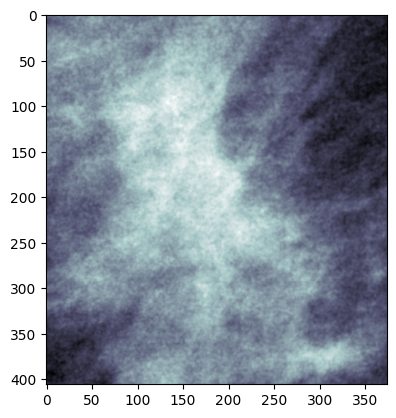

In [59]:
#Tamaño original
plt.imshow(pydicom.dcmread(X_train[100]).pixel_array, cmap=plt.cm.bone) # Img Original

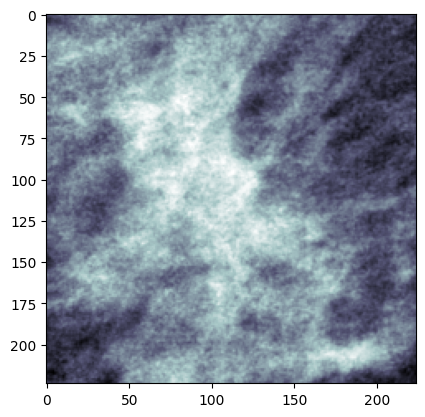

In [60]:
#imagen con resize
plt.imshow(resize_dicom_con_clahe(pydicom.dcmread(X_train[100]),224,224), cmap=plt.cm.bone) #Img con resize

# Obtencion de imagenes como tensores

In [61]:
#Funcion que les hace resize a las imagenes y obtiene los pixeles resultantes den forma de tensores
def genera_tensores_train_test(width,height,lista_de_rutas):
    """
    width a redimensionar
    height a redimensionar
    lista de rutas
    """
    imgs_tensores = []

    for file in list(lista_de_rutas):
        read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
        img_tensor = resize_dicom_con_clahe(read_img_dicom,width,height) #Lammado a la funcion resize_dicom ---> Tensor de "16 bits" con dtype = float32
        imgs_tensores.append(img_tensor) #juntar los tensores
        
    # Convertir listas a (arrays de NumPy) Tensores
    imagenes = tf.stack(imgs_tensores) #Axis = 0 por default, concatena en vertical(columnas), axis = 1 en horizontal (filas). --->(num_imgs,width,height,1)
    return imagenes # Tensores 
        

## Obtencion de las imágenes como tensores

imgs_train, imgs_val e imgs_test

In [63]:
imgs_train = genera_tensores_train_test(224,224,X_train) 

In [64]:
len(imgs_train)

1828

In [65]:
imgs_val = genera_tensores_train_test(224,224,X_val) 

In [66]:
len(imgs_val)

458

In [67]:
imgs_test = genera_tensores_train_test(224,224,rutas_test) 

In [68]:
len(imgs_test)

600

# Preprocesamiento:

In [69]:
# Convertir del rango (0-65535) a (0-255). Recordemos que  2**8 =  (DATOS(2**16)/2**8) neq (65535/65535)*255
train_images_comb = (imgs_train/65535)*255
val_images_comb = (imgs_val/65535)*255
test_images_comb = (imgs_test/65535)*255

In [70]:
#Replicate the only color channel (gray) 3 times, for Pre-trained Nets compatibility (se puede usar tf.TILE)
train_images_comb  = tf.image.grayscale_to_rgb(train_images_comb)
val_images_comb = tf.image.grayscale_to_rgb(val_images_comb)
test_images_comb = tf.image.grayscale_to_rgb(test_images_comb)

In [71]:
train_images_comb.shape

TensorShape([1828, 224, 224, 3])

In [72]:
val_images_comb.shape

TensorShape([458, 224, 224, 3])

In [73]:
test_images_comb

<tf.Tensor: shape=(600, 224, 224, 3), dtype=float32, numpy=
array([[[[146.3494  , 146.3494  , 146.3494  ],
         [158.69576 , 158.69576 , 158.69576 ],
         [164.17729 , 164.17729 , 164.17729 ],
         ...,
         [195.88649 , 195.88649 , 195.88649 ],
         [200.3669  , 200.3669  , 200.3669  ],
         [205.40273 , 205.40273 , 205.40273 ]],

        [[148.24911 , 148.24911 , 148.24911 ],
         [156.34973 , 156.34973 , 156.34973 ],
         [159.8715  , 159.8715  , 159.8715  ],
         ...,
         [202.08354 , 202.08354 , 202.08354 ],
         [206.69844 , 206.69844 , 206.69844 ],
         [205.91345 , 205.91345 , 205.91345 ]],

        [[157.20828 , 157.20828 , 157.20828 ],
         [160.43144 , 160.43144 , 160.43144 ],
         [157.85881 , 157.85881 , 157.85881 ],
         ...,
         [210.68518 , 210.68518 , 210.68518 ],
         [216.30548 , 216.30548 , 216.30548 ],
         [215.08269 , 215.08269 , 215.08269 ]],

        ...,

        [[151.61153 , 151.61153 

# Experimento

In [74]:
from keras import layers
from keras import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications import ResNet50, InceptionV3, DenseNet121, MobileNetV2, VGG19, VGG16
#from keras.applications.vgg19 import preprocess_input as  vgg_preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input as res_preprocess_input
#from keras.applications.inception_v3 import preprocess_input as inv3_preprocess_input
#from keras.applications.densenet import preprocess_input as dens_preprocess_input
#from keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess_input

Importante al seleccionar la red y el preprocess_input

In [75]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input

# VGG19

In [78]:
# Preprocess the test images
test_preprocess = vgg19_preprocess_input(test_images_comb)

MODELO

In [79]:
def create_vgg19(fc_size, verbose=False, dropout=None): #fc_size=Número de neuronas finales
  vgg19_base = VGG19(weights='imagenet', #Base convolucional CORRESPONDIENTE
                       include_top=False,
                       input_shape=(224,224, 3)) # Modifica según el tipo de entrada
  vgg19 = models.Sequential()
  vgg19.add(vgg19_base)

  vgg19.add(layers.Flatten())

  #Global AVG Pooling 2D
  #vgg19.add(layers.GlobalAveragePooling2D())
  if dropout is not None:
    vgg19.add(layers.Dropout(dropout, seed=42)) # SEMILLA
  vgg19.add(layers.Dense(fc_size, activation='relu'))
  vgg19.add(layers.Dense(1, activation='sigmoid')) # TIPO de PROBLEA: Binario o Multietiqueta

  # Freeze the convolutional base
  vgg19_base.trainable = False

  if verbose:
    vgg19_base.summary()
    vgg19.summary()

  return vgg19

In [80]:
Ejemplo = create_vgg19(512, verbose=True)

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [81]:
# Create a HARD generator for training images
train_datagen_HARD_vgg19 = ImageDataGenerator(
    preprocessing_function = vgg19_preprocess_input, #Preprocess indicado
    #validation_split=0.2, #!!! Separa en validación y entrenamiento !!!
    rotation_range=90,#antes 180
    width_shift_range=0.1,#antes 0.2
    height_shift_range=0.1, # antes 0.2
    shear_range=20, #N Originalmente 10, luego 15
    zoom_range=0.2, #bien
    brightness_range = [0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
)

# Fit the generator with some images
train_datagen_HARD_vgg19.fit(train_images_comb)
val_datagen_vgg19 = ImageDataGenerator(preprocessing_function = vgg19_preprocess_input) #Preprocess_input adecuada 

# Split train images into actual training and validation
train_generator_HARD_vgg19 = train_datagen_HARD_vgg19.flow(train_images_comb, y_train, batch_size=128, shuffle=False)#, subset='training')
validation_generator_vgg19 = val_datagen_vgg19.flow(val_images_comb, y_val, batch_size=128,shuffle=False)#, subset='validation')
#Se comenta subset ya que se ocupan distintos conjuntos de entrenamiento y validación, shuffle=True por default


In [99]:
# Instantiate network with custom final layer
fc_size = 1024
vgg19_fe_DO_H = create_vgg19(fc_size = fc_size,dropout=0.5)

# Early stopping (stop training after the validation loss reaches the minimum)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1)

# Callback for checkpointing
checkpoint = ModelCheckpoint('vgg19_fe_2cl_M-B_best'+f'_{fc_size}_DO_HARD.h5',#NOMBRE
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)

# Compile the model
vgg19_fe_DO_H.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # Cambiar el loss dependiendo del problema

In [100]:
# Train
history_vgg19_fe_DO_H = vgg19_fe_DO_H.fit_generator(
        train_generator_HARD_vgg19, #Generador adecuado
        steps_per_epoch = len(X_train) // 128, #len(train_generator_HARD_vgg19), #n_train_img // 128, modificar 128 si se modifica el batch size
        epochs=200,
        validation_data=validation_generator_vgg19,## GENRADOR CORRESP
        validation_steps=len(X_val)//128, #Parametro a usar dependiendo si se dispone de validation data
        callbacks= [checkpoint, earlystopping],
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(vgg19_fe_DO_H, 'vgg19_fe_2cl_M-B_end'+f'_{fc_size}_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_13044\2403054863.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg19_fe_DO_H = vgg19_fe_DO_H.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 14.8401 - accuracy: 0.5379
Epoch 1: val_loss improved from inf to 0.66139, saving model to vgg19_fe_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 12s 812ms/step - loss: 14.8401 - accuracy: 0.5379 - val_loss: 0.6614 - val_accuracy: 0.6536
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.6049
Epoch 2: val_loss did not improve from 0.66139
14/14 [==============================] - 10s 702ms/step - loss: 0.6804 - accuracy: 0.6049 - val_loss: 0.7630 - val_accuracy: 0.5182
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.5977
Epoch 3: val_loss improved from 0.66139 to 0.63874, saving model to vgg19_fe_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 12s 831ms/step - loss: 0.7191 - accuracy: 0.5977 - val_loss: 0.6387 - val_accuracy: 0.6406
Epoch 4/200
14/14 [==============================] - ETA: 0s -

In [101]:
#History of accuracy and loss
tra_loss_fe = history_vgg19_fe_DO_H.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_vgg19_fe_DO_H.history['accuracy'] #######
val_loss_fe = history_vgg19_fe_DO_H.history['val_loss'] ########
val_acc_fe = history_vgg19_fe_DO_H.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set
opt_vgg19_fe_DO_H = models.load_model('vgg19_fe_2cl_M-B_best'+f'_{fc_size}_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = vgg19_fe_DO_H.evaluate(test_images_comb, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_fe_DO_H.evaluate(test_images_comb, etiq_test, verbose=False) ##

print(f"VGG19 Feature Extraction W/ dropout Hard DA {fc_size}\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

#OBSERVACIÓN: Se debe evaluar en test_preprocess y no en test_images_comb:

#test_loss_fe, test_acc_fe = vgg19_fe_DO_H.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
#opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_fe_DO_H.evaluate(test_preprocess , etiq_test, verbose=False) ##
#La evaluación correcta en el Test con el modelo óptimo se hizo abajo. Este error NO afecta el entrenamiento,
#ya que la función vgg19_preprocess_input fue ingresada en el ImageDataGenerator 

VGG19 Feature Extraction W/ dropout Hard DA 1024

Epoch [end]: 60
Epoch [opt]: 30
Valid accuracy [end]: 0.6484
Valid accuracy [opt]: 0.6745
Test accuracy [end]:  0.6367
Test accuracy [opt]:  0.6450
Valid loss [end]: 0.6136
Valid loss [opt]: 0.5949
Test loss [end]:  0.7900
Test loss [opt]:  0.7235


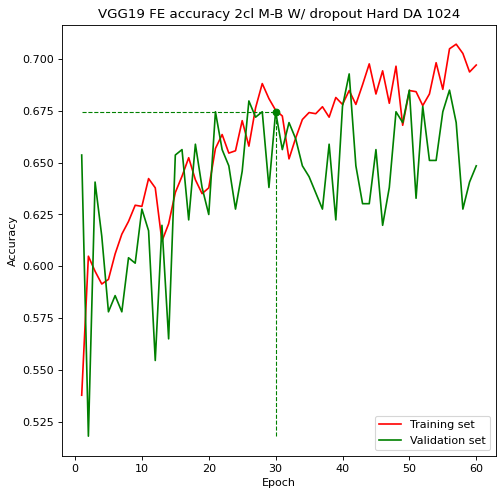

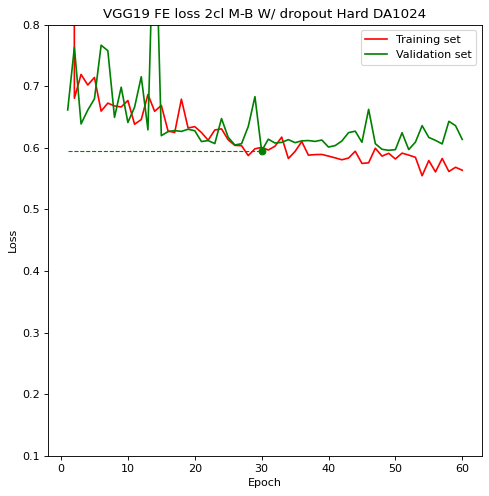

In [102]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'VGG19 FE accuracy 2cl M-B W/ dropout Hard DA {fc_size}')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'VGG19 FE loss 2cl M-B W/ dropout Hard DA{fc_size}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [79]:
mod_1024 = models.load_model(r'vgg19_fe_2cl_M-B_best_1024_DO_HARD.h5')
mod_1024.evaluate(test_preprocess,etiq_test) #0.6449

19/19 [==============================] - 6s 103ms/step - loss: 0.6576 - accuracy: 0.6450


[0.6576483845710754, 0.6449999809265137]

VGG19 Feature Extraction W/ dropout Hard DA 1024

- Epoch [end]: 60
- Epoch [opt]: 30
- Valid accuracy [end]: 0.6484
- Valid accuracy [opt]: 0.6745
- Test accuracy [end]:  0.6367
- Test accuracy [opt]:  0.6450
- Valid loss [end]: 0.6136
- Valid loss [opt]: 0.5949
- Test loss [end]:  0.7900
- Test loss [opt]:  0.7235

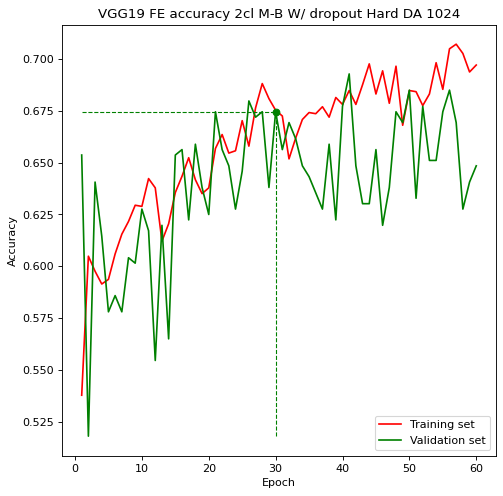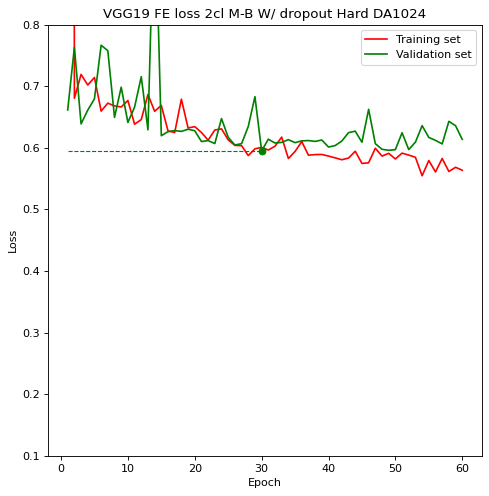

In [80]:
mod_128 = models.load_model(r'vgg19_fe_2cl_M-B_best_128_DO_HARD.h5')
mod_128.evaluate(test_preprocess,etiq_test) #0.6299

19/19 [==============================] - 1s 43ms/step - loss: 0.6625 - accuracy: 0.6300


[0.6625140309333801, 0.6299999952316284]

VGG19 Feature Extraction W/ dropout Hard DA 128

- Epoch [end]: 81
- Epoch [opt]: 51
- Valid accuracy [end]: 0.6823
- Valid accuracy [opt]: 0.6901
- Test accuracy [end]:  0.6167
- Test accuracy [opt]:  0.6450
- Valid loss [end]: 0.5720
- Valid loss [opt]: 0.5681
- Test loss [end]:  0.7752
- Test loss [opt]:  0.7363

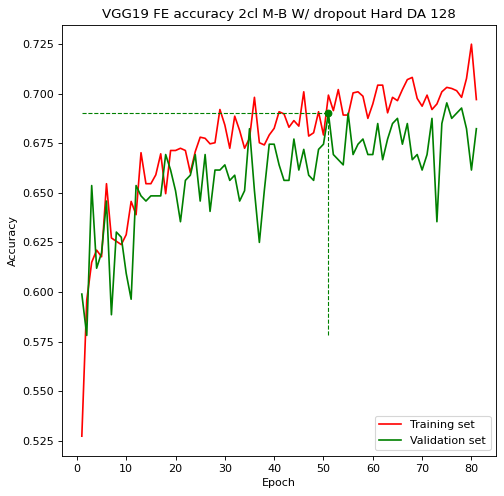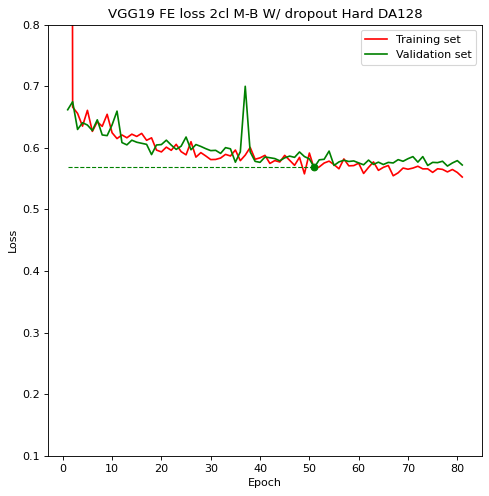

In [81]:
mod_256 = models.load_model(r'vgg19_fe_2cl_M-B_best_256_DO_HARD.h5')
mod_256.evaluate(test_preprocess,etiq_test) #0.6333

19/19 [==============================] - 1s 43ms/step - loss: 0.6478 - accuracy: 0.6333


[0.6477681994438171, 0.6333333253860474]

VGG19 Feature Extraction W/ dropout Hard DA 256

- Epoch [end]: 78
- Epoch [opt]: 48
- Valid accuracy [end]: 0.6953
- Valid accuracy [opt]: 0.7031
- Test accuracy [end]:  0.6467
- Test accuracy [opt]:  0.6417
- Valid loss [end]: 0.5968
- Valid loss [opt]: 0.5739
- Test loss [end]:  0.7789
- Test loss [opt]:  0.7067

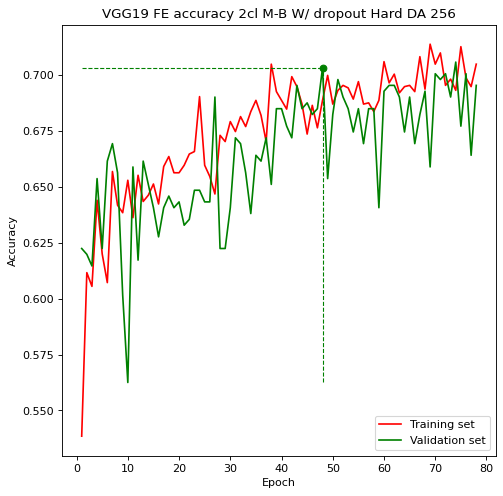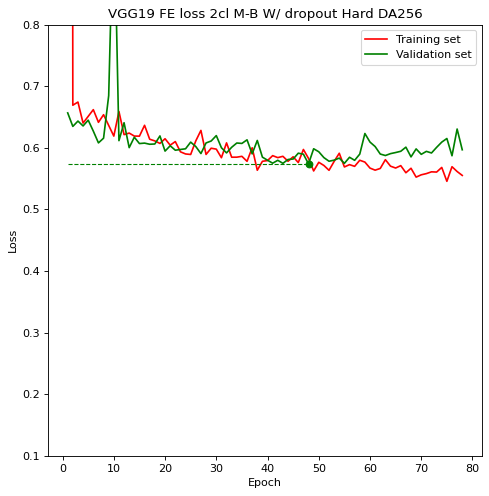

In [82]:
mod_512 = models.load_model(r'vgg19_fe_2cl_M-B_best_512_DO_HARD.h5')
mod_512.evaluate(test_preprocess,etiq_test) #0.6549

19/19 [==============================] - 1s 42ms/step - loss: 0.6592 - accuracy: 0.6550


[0.659228503704071, 0.6549999713897705]

VGG19 Feature Extraction W/ dropout Hard DA 512

- Epoch [end]: 94
- Epoch [opt]: 64
- Valid accuracy [end]: 0.6823
- Valid accuracy [opt]: 0.6901
- Test accuracy [end]:  0.6283
- Test accuracy [opt]:  0.6483
- Valid loss [end]: 0.5903
- Valid loss [opt]: 0.5736
- Test loss [end]:  0.7468
- Test loss [opt]:  0.7289

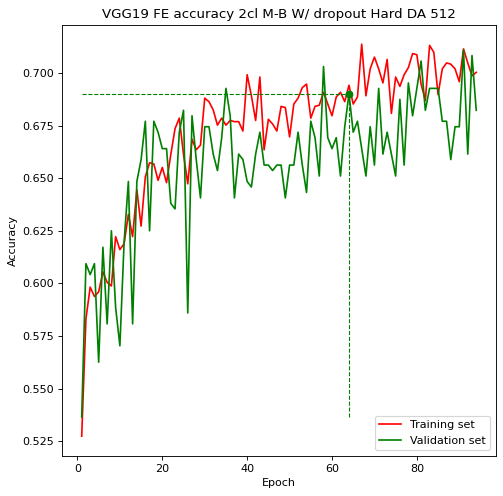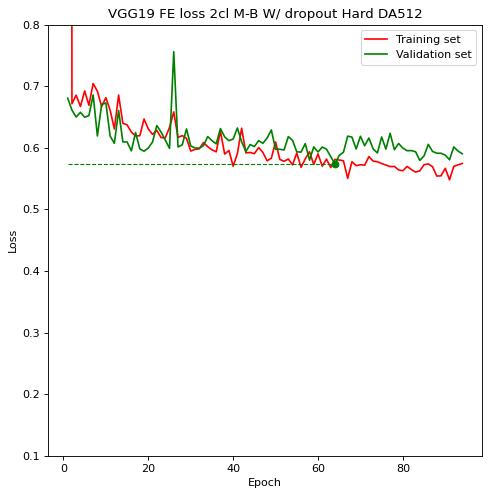

In [97]:
del vgg19_fe_DO_H

In [98]:
del history_vgg19_fe_DO_H

# Fine Tuning 1 layer

In [82]:
from tensorflow.keras.optimizers import RMSprop

In [83]:
vgg19_FT_1layer = models.load_model('vgg19_fe_2cl_M-B_best_1024_DO_HARD.h5') 

#Fine Tuning: unfreeze the last convolutional layer
for layer in vgg19_FT_1layer.get_layer('vgg19').layers: #Ver MODELO
    if layer.name.startswith('block5_conv4'): #Ver nombre de capas
        layer.trainable = True
    else:
        layer.trainable = False

# Recompile the model
vgg19_FT_1layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#vgg19_FT_1layer.summary()
#vgg19_FT_1layer.get_layer('vgg19').summary()

In [84]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('vgg19_FT_1layer_2cl_M-B_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [85]:
# Train
history_FT_1L = vgg19_FT_1layer.fit_generator(
        train_generator_HARD_vgg19, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg19), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_vgg19,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(vgg19_FT_1layer, 'vgg19_FT_1layer_2cl_M-B_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_16444\2195641900.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_1L = vgg19_FT_1layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.6819
Epoch 1: val_loss improved from inf to 0.58101, saving model to vgg19_FT_1layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 16s 763ms/step - loss: 0.5927 - accuracy: 0.6819 - val_loss: 0.5810 - val_accuracy: 0.6849
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.6881
Epoch 2: val_loss did not improve from 0.58101
14/14 [==============================] - 9s 648ms/step - loss: 0.5708 - accuracy: 0.6881 - val_loss: 0.5870 - val_accuracy: 0.6901
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.6853
Epoch 3: val_loss did not improve from 0.58101
14/14 [==============================] - 9s 651ms/step - loss: 0.5746 - accuracy: 0.6853 - val_loss: 0.5955 - val_accuracy: 0.6589
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7104
Epoch 4: val_loss impro

In [86]:
#History of accuracy and loss
tra_loss_fe = history_FT_1L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_1L.history['accuracy'] #######
val_loss_fe = history_FT_1L.history['val_loss'] ########
val_acc_fe = history_FT_1L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_vgg19_FT = models.load_model('vgg19_FT_1layer_2cl_M-B_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = vgg19_FT_1layer.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_FT.evaluate(test_preprocess, etiq_test, verbose=False) ##

print("VGG19 Fine Tunig 1 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

VGG19 Fine Tunig 1 Layer (W/ dropout Hard DA) 1024 U

Epoch [end]: 133
Epoch [opt]: 103
Valid accuracy [end]: 0.7135
Valid accuracy [opt]: 0.7188
Test accuracy [end]:  0.7017
Test accuracy [opt]:  0.6633
Valid loss [end]: 0.5428
Valid loss [opt]: 0.5290
Test loss [end]:  0.6665
Test loss [opt]:  0.6787


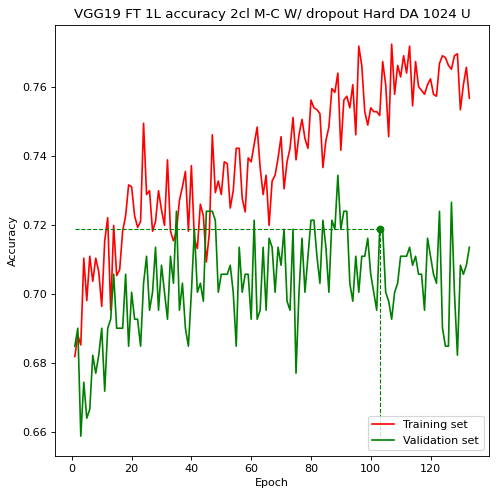

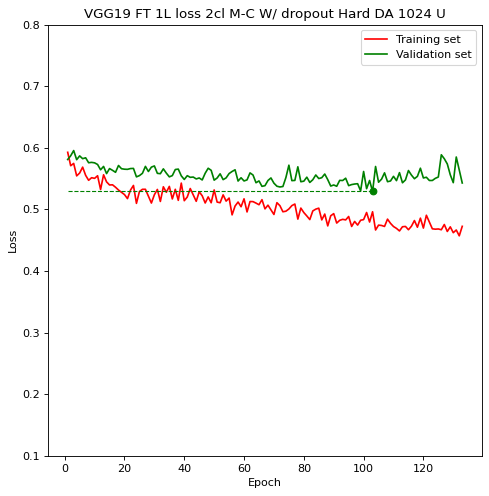

In [87]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 1L accuracy 2cl M-C W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 1L loss 2cl M-C W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [88]:
mod512_FT_1 = models.load_model('vgg19_FT_1layer_2cl_M-B_best_512_DO_HARD.h5') #####Carga el modelo 
mod512_FT_1.evaluate(test_preprocess, etiq_test) #######Evalua modelo

19/19 [==============================] - 1s 45ms/step - loss: 0.6322 - accuracy: 0.6783


[0.6322226524353027, 0.6783333420753479]

VGG19 Fine Tunig 1 Layer (W/ dropout Hard DA) 512 U

- Epoch [end]: 51
- Epoch [opt]: 21
- Valid accuracy [end]: 0.7031
- Valid accuracy [opt]: 0.7292
- Test accuracy [end]:  0.6833
- Test accuracy [opt]:  0.6633
- Valid loss [end]: 0.5509
- Valid loss [opt]: 0.5347
- Test loss [end]:  0.8601
- Test loss [opt]:  0.7711

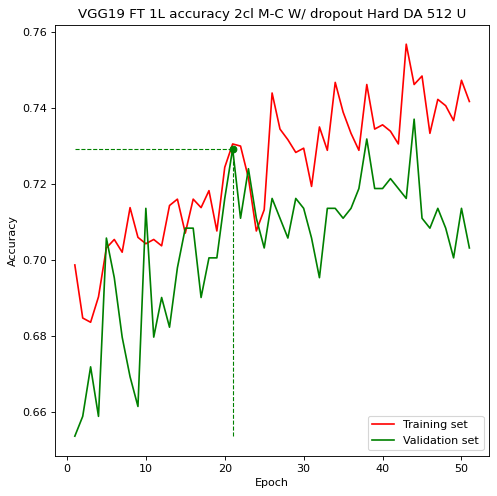

# Fine Tuning 2 layers

In [89]:
vgg19_FT_2layer = models.load_model('vgg19_FT_1layer_2cl_M-B_best_1024_DO_HARD.h5') 

#Fine Tuning: unfreeze the last convolutional layer
for layer in vgg19_FT_2layer.get_layer('vgg19').layers: #Ver modelo
    if layer.name in ('block5_conv4', 'block5_conv3'): #Ver nombre de capas
        layer.trainable = True
    else:
        layer.trainable = False

# Recompile the model
vgg19_FT_2layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#vgg19_FT_2layer.summary()
#vgg19_FT_2layer.get_layer('vgg19').summary() #Nombre S

In [90]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('vgg19_FT_2layer_2cl_M-B_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [91]:
# Train
history_FT_2L = vgg19_FT_2layer.fit_generator(
        train_generator_HARD_vgg19, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg19), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_vgg19,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(vgg19_FT_2layer, 'vgg19_FT_2layer_2cl_M-B_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_16444\2497896145.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_2L = vgg19_FT_2layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 0.6413 - accuracy: 0.6936
Epoch 1: val_loss improved from inf to 0.56074, saving model to vgg19_FT_2layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 12s 803ms/step - loss: 0.6413 - accuracy: 0.6936 - val_loss: 0.5607 - val_accuracy: 0.6979
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.7288
Epoch 2: val_loss did not improve from 0.56074
14/14 [==============================] - 9s 642ms/step - loss: 0.5211 - accuracy: 0.7288 - val_loss: 0.5677 - val_accuracy: 0.6953
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.5110 - accuracy: 0.7366
Epoch 3: val_loss did not improve from 0.56074
14/14 [==============================] - 9s 652ms/step - loss: 0.5110 - accuracy: 0.7366 - val_loss: 0.6522 - val_accuracy: 0.6771
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.5457 - accuracy: 0.7238
Epoch 4: val_loss impro

In [93]:
#History of accuracy and loss
tra_loss_fe = history_FT_2L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_2L.history['accuracy'] #######
val_loss_fe = history_FT_2L.history['val_loss'] ########
val_acc_fe = history_FT_2L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_vgg19_FT_2L = models.load_model('vgg19_FT_2layer_2cl_M-B_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = vgg19_FT_2layer.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_FT_2L.evaluate(test_preprocess, etiq_test, verbose=False) ##

print("VGG19 Fine Tunig 2 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

VGG19 Fine Tunig 2 Layer (W/ dropout Hard DA) 512 U

Epoch [end]: 79
Epoch [opt]: 49
Valid accuracy [end]: 0.7240
Valid accuracy [opt]: 0.7370
Test accuracy [end]:  0.6917
Test accuracy [opt]:  0.6600
Valid loss [end]: 0.5460
Valid loss [opt]: 0.5011
Test loss [end]:  0.7506
Test loss [opt]:  0.6739


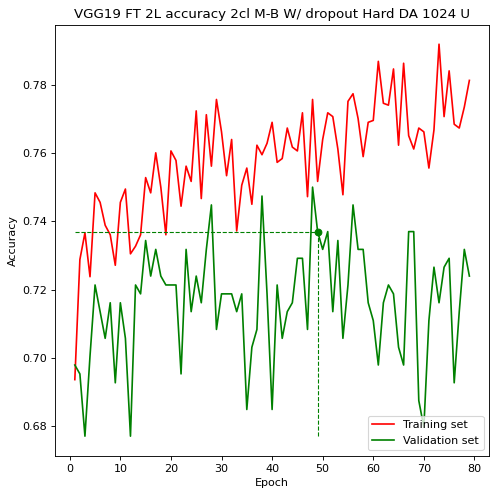

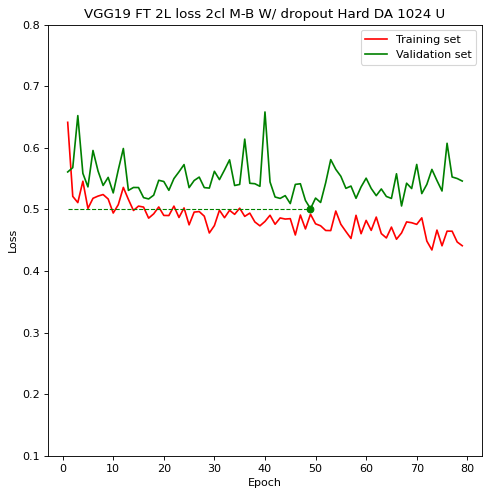

In [94]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 2L accuracy 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 2L loss 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [95]:
mod512_FT_2 = models.load_model('vgg19_FT_2layer_2cl_M-B_best_512_DO_HARD.h5') #####Carga el modelo 
mod512_FT_2.evaluate(test_preprocess, etiq_test) #######Evalua modelo

19/19 [==============================] - 1s 44ms/step - loss: 0.6320 - accuracy: 0.6950


[0.6320272088050842, 0.6949999928474426]

VGG19 Fine Tunig 2 Layer (W/ dropout Hard DA) 512 U

- Epoch [end]: 90
- Epoch [opt]: 60
- Valid accuracy [end]: 0.7500
- Valid accuracy [opt]: 0.7240
- Test accuracy [end]:  0.6783
- Test accuracy [opt]:  0.7000
- Valid loss [end]: 0.6028
- Valid loss [opt]: 0.5045
- Test loss [end]:  1.3364
- Test loss [opt]:  0.7336

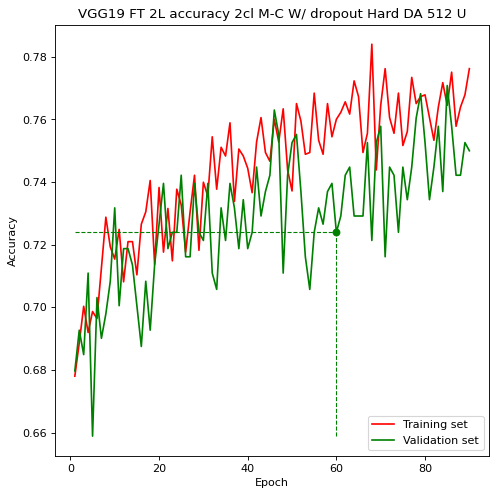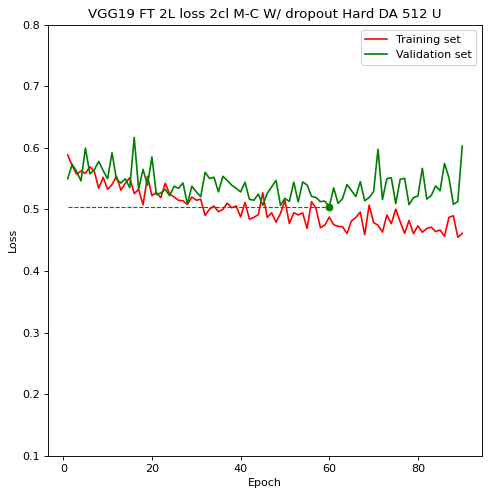

# Fine Tuning 3 Layer

In [96]:
vgg19_FT_3layer = models.load_model('vgg19_FT_2layer_2cl_M-B_best_1024_DO_HARD.h5') 

#Fine Tuning: unfreeze the last convolutional layer
for layer in vgg19_FT_3layer.get_layer('vgg19').layers: #Ver modelo
    if layer.name in ('block5_conv4', 'block5_conv3', 'block5_conv2'): #Ver nombre de capas
        layer.trainable = True
    else:
        layer.trainable = False

# Recompile the model
vgg19_FT_3layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#vgg19_FT_3layer.summary()
#gg19_FT_3layer.get_layer('vgg19').summary() #Nombre S

In [97]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [98]:
# Train
history_FT_3L = vgg19_FT_3layer.fit_generator(
        train_generator_HARD_vgg19, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg19), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_vgg19,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(vgg19_FT_3layer, 'vgg19_FT_3layer_2cl_M-B_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_16444\3436712873.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_3L = vgg19_FT_3layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 3.2446 - accuracy: 0.6551
Epoch 1: val_loss improved from inf to 0.58060, saving model to vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 12s 800ms/step - loss: 3.2446 - accuracy: 0.6551 - val_loss: 0.5806 - val_accuracy: 0.7031
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.6791
Epoch 2: val_loss improved from 0.58060 to 0.56208, saving model to vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 11s 796ms/step - loss: 0.5723 - accuracy: 0.6791 - val_loss: 0.5621 - val_accuracy: 0.7135
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.7210
Epoch 3: val_loss improved from 0.56208 to 0.55393, saving model to vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 11s 785ms/step - loss: 0.5439 - accuracy: 0.7210 - val_loss: 0.5539 - val_a

In [99]:
#History of accuracy and loss
tra_loss_fe = history_FT_3L.history['loss'] # RENOMBRAR SI ES OTRO H5
tra_acc_fe = history_FT_3L.history['accuracy'] #######
val_loss_fe = history_FT_3L.history['val_loss'] ########
val_acc_fe = history_FT_3L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_vgg19_FT_3L = models.load_model('vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = vgg19_FT_3layer.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_FT_3L.evaluate(test_preprocess, etiq_test, verbose=False) ##

print("VGG19 Fine Tunig 3 Layer (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

VGG19 Fine Tunig 3 Layer (W/ dropout Hard DA) 1024 U

Epoch [end]: 84
Epoch [opt]: 54
Valid accuracy [end]: 0.7214
Valid accuracy [opt]: 0.7474
Test accuracy [end]:  0.7017
Test accuracy [opt]:  0.6900
Valid loss [end]: 0.6674
Valid loss [opt]: 0.5039
Test loss [end]:  0.8283
Test loss [opt]:  0.6243


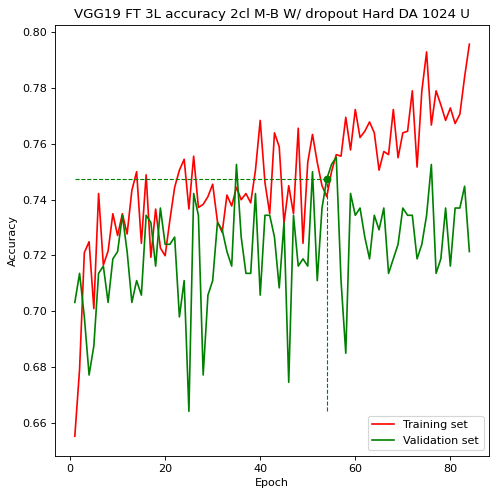

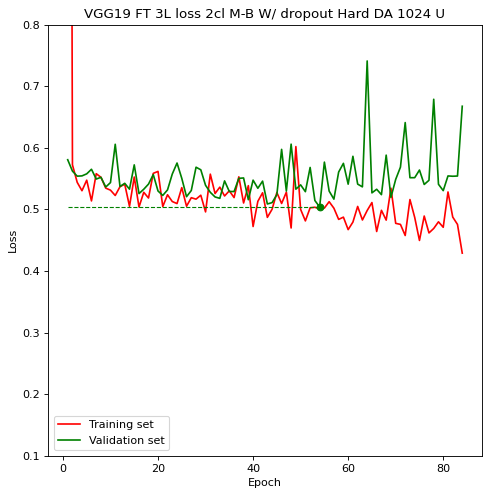

In [100]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 3L accuracy 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 3L loss 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [101]:
mod512_FT_3 = models.load_model('vgg19_FT_3layer_2cl_M-B_best_512_DO_HARD.h5') #####Carga el modelo 
mod512_FT_3.evaluate(test_preprocess, etiq_test) #######Evalua modelo

19/19 [==============================] - 1s 49ms/step - loss: 0.6310 - accuracy: 0.6883


[0.6310350298881531, 0.6883333325386047]

VGG19 Fine Tunig 3 Layer (W/ dropout Hard DA) 512 U

- Epoch [end]: 58
- Epoch [opt]: 28
- Valid accuracy [end]: 0.7292
- Valid accuracy [opt]: 0.7396
- Test accuracy [end]:  0.7033
- Test accuracy [opt]:  0.6967
- Valid loss [end]: 0.5550
- Valid loss [opt]: 0.5052
- Test loss [end]:  0.8440
- Test loss [opt]:  0.7007

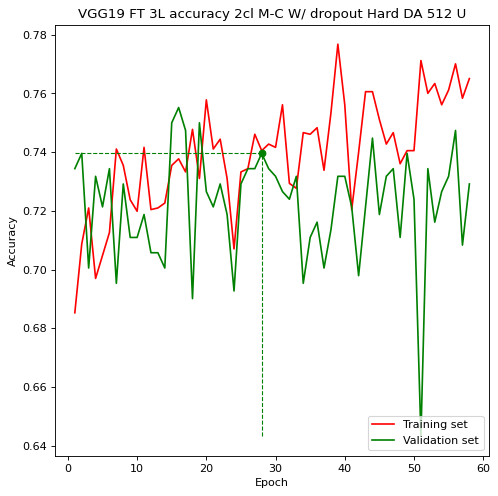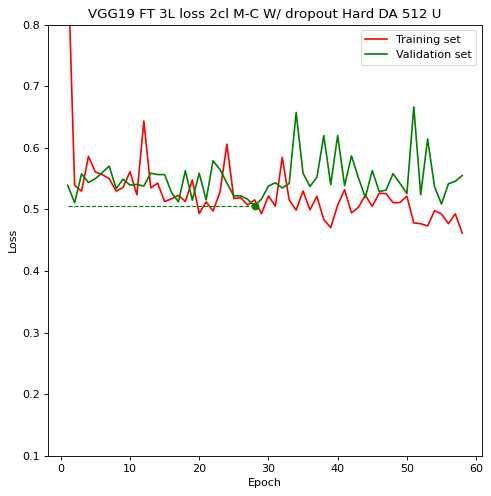

# 4 Layer 

In [102]:
vgg19_FT_4layer = models.load_model('vgg19_FT_3layer_2cl_M-B_best_1024_DO_HARD.h5') 

#Fine Tuning: unfreeze the last convolutional layer
for layer in vgg19_FT_4layer.get_layer('vgg19').layers: #Ver modelo
    if layer.name in ('block5_conv4', 'block5_conv3', 'block5_conv2', 'block5_conv1'): #Ver nombre de capas
        layer.trainable = True
    else:
        layer.trainable = False

# Recompile the model
vgg19_FT_4layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#vgg19_FT_4layer_end.summary()
#vgg19_FT_4layer_end.get_layer('vgg19').summary() #Nombre S

In [103]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('vgg19_FT_4layer_2cl_M-B_best_1024_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [104]:
# Train
history_FT_4L = vgg19_FT_4layer.fit_generator(
        train_generator_HARD_vgg19, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_vgg19), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_vgg19,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(vgg19_FT_4layer, 'vgg19_FT_4layer_2cl_M-B_end_1024_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_16444\1383491606.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_4L = vgg19_FT_4layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 6.0389 - accuracy: 0.6088
Epoch 1: val_loss improved from inf to 0.61904, saving model to vgg19_FT_4layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 12s 816ms/step - loss: 6.0389 - accuracy: 0.6088 - val_loss: 0.6190 - val_accuracy: 0.6641
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.6586 - accuracy: 0.6256
Epoch 2: val_loss improved from 0.61904 to 0.58366, saving model to vgg19_FT_4layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 11s 807ms/step - loss: 0.6586 - accuracy: 0.6256 - val_loss: 0.5837 - val_accuracy: 0.6745
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.6136 - accuracy: 0.6624
Epoch 3: val_loss improved from 0.58366 to 0.56422, saving model to vgg19_FT_4layer_2cl_M-B_best_1024_DO_HARD.h5
14/14 [==============================] - 11s 799ms/step - loss: 0.6136 - accuracy: 0.6624 - val_loss: 0.5642 - val_a

In [105]:
#History of accuracy and loss
tra_loss_fe = history_FT_4L.history['loss'] # 
tra_acc_fe = history_FT_4L.history['accuracy'] #######
val_loss_fe = history_FT_4L.history['val_loss'] ########
val_acc_fe = history_FT_4L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_vgg19_FT_4L = models.load_model('vgg19_FT_4layer_2cl_M-B_best_1024_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = vgg19_FT_4layer.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_vgg19_FT_4L.evaluate(test_preprocess, etiq_test, verbose=False) ##

print("VGG19 Fine Tunig 4 Layer (end) (W/ dropout Hard DA) 1024 U\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

VGG19 Fine Tunig 4 Layer (end) (W/ dropout Hard DA) 1024 U

Epoch [end]: 68
Epoch [opt]: 38
Valid accuracy [end]: 0.7214
Valid accuracy [opt]: 0.7318
Test accuracy [end]:  0.6817
Test accuracy [opt]:  0.6850
Valid loss [end]: 0.5551
Valid loss [opt]: 0.5020
Test loss [end]:  0.6762
Test loss [opt]:  0.6440


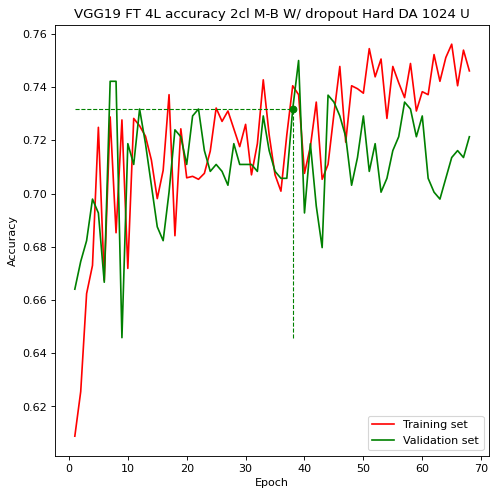

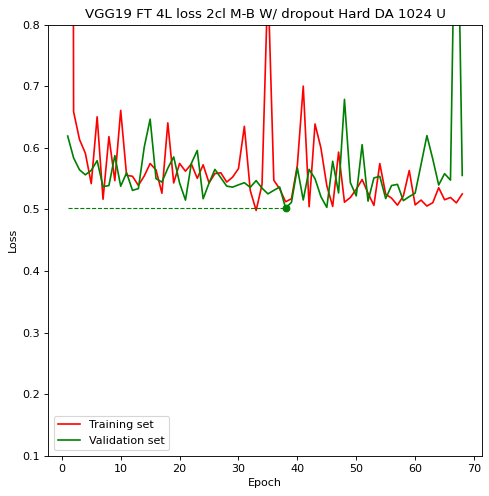

In [106]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 4L accuracy 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('VGG19 FT 4L loss 2cl M-B W/ dropout Hard DA 1024 U')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [107]:
mod512_FT_4 = models.load_model('vgg19_FT_4layer_2cl_M-B_best_512_DO_HARD.h5') #####Carga el modelo 
mod512_FT_4.evaluate(test_preprocess, etiq_test) #######Evalua modelo

19/19 [==============================] - 1s 43ms/step - loss: 0.9724 - accuracy: 0.6733


[0.972427248954773, 0.6733333468437195]